In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# data 불러오기 및 전처리

In [143]:
df = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\daconincomeforecast\\train.csv')
df_test = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\daconincomeforecast\\test.csv')
########################################################################
# 트레인 셋
# 연속형 변수 추출
df = df[df['Gains'] < 90000] # 이상치 제거
df_int = df[df.describe().columns]
# 이산형 변수 추출
df_str = df[df.columns.difference(df.describe().columns)]
#######################################################################
# 테스트 셋
df_test = df_test.drop(['ID'],axis=1)
df_test_int = df_test[df_test.describe().columns]
# 이산형 변수 추출
df_test_str = df_test[df_test.columns.difference(df_test.describe().columns)]

In [150]:

df_int_X = df_int.drop(['Income'],axis=1)
y = df_int[['Income']]
df_str = df_str.drop(['ID'],axis =1)# ID 삭제

In [184]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
minmax = MinMaxScaler()
minmax2 = MinMaxScaler()
normalizer = Normalizer()
standard = StandardScaler()

scale1= minmax.fit_transform(df_int_X)
scale2= normalizer.fit_transform(df_int_X)
scale3= standard.fit_transform(df_int_X)
scale_y= minmax2.fit_transform(y)
scale_test= minmax.fit_transform(df_test_int)

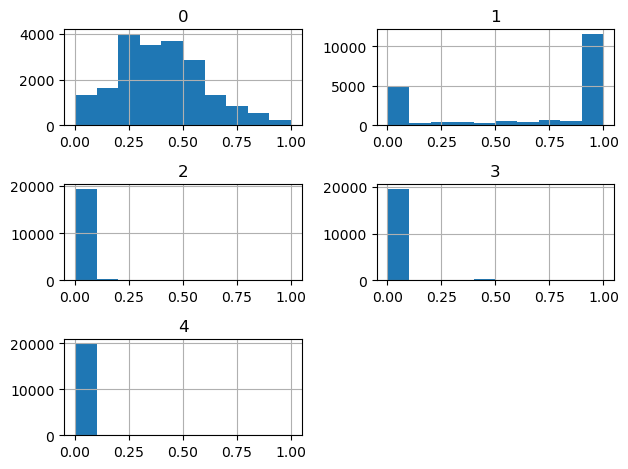

In [84]:
pd.DataFrame(scale1).hist();
plt.tight_layout()
plt.show()

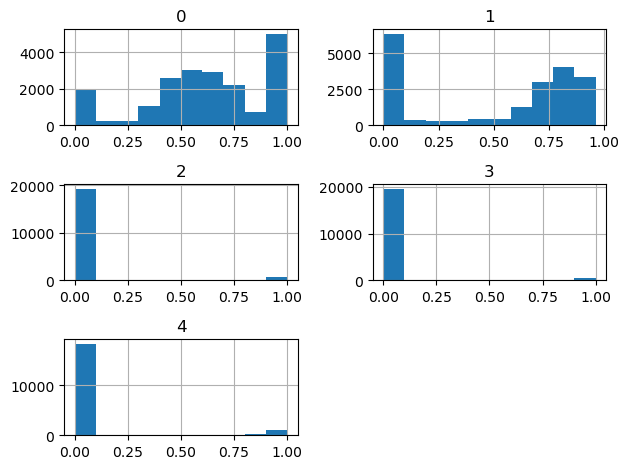

In [85]:
pd.DataFrame(scale2).hist();
plt.tight_layout()
plt.show()

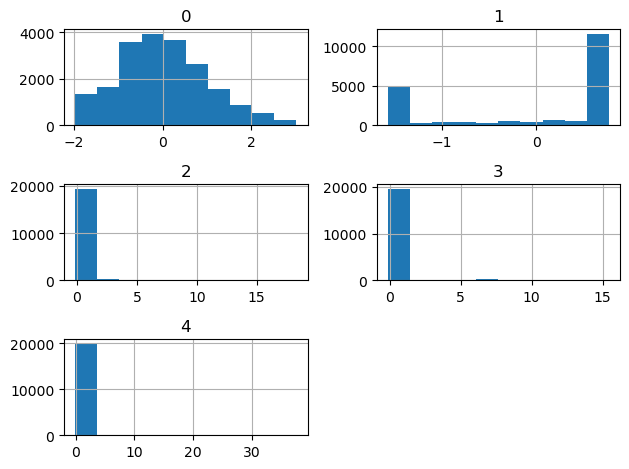

In [47]:
pd.DataFrame(scale3).hist();
plt.tight_layout()
plt.show()

---

In [154]:
df_test_str.shape

(10000, 16)

In [155]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_str).toarray()
encoder1 = LabelEncoder()
encoded_data1 = encoder1.fit_transform(np.ravel(df_str))

encoded_test = encoder1.fit_transform(np.ravel(df_test_str))
encoded_data.shape, encoded_data1.reshape(-1,16).shape, df_str.shape, encoded_test.reshape(-1,16).shape

((19970, 270), (19970, 16), (19970, 16), (10000, 16))

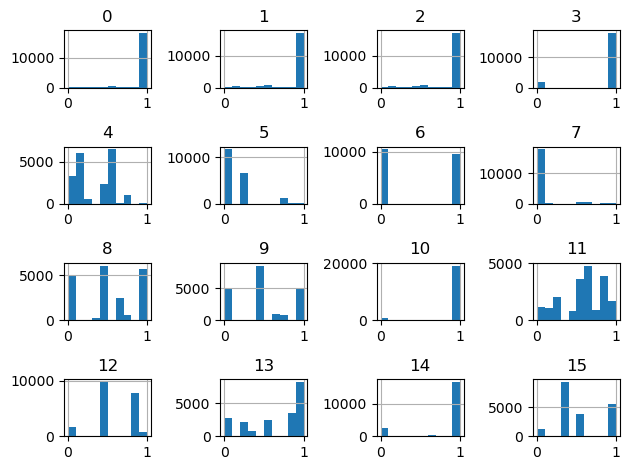

In [156]:
asdf = encoded_data1.reshape(-1,16)
asdf2 =  encoded_test.reshape(-1,16)
asdf_scale= minmax.fit_transform(asdf)
asdf_scale2= minmax.fit_transform(asdf2)

pd.DataFrame(asdf_scale).hist()
plt.tight_layout()
plt.show()

----

In [112]:
df_fit_X= pd.concat([pd.DataFrame(scale1), pd.DataFrame(asdf_scale)], axis=1)
df_fit_X.columns = np.concatenate([df_int_X.columns.values,df_str.columns.values],axis=0)
df_fit_X

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Citizenship,Education_Status,...,Gender,Hispanic_Origin,Household_Status,Household_Summary,Income_Status,Industry_Status,Martial_Status,Occupation_Status,Race,Tax_Status
0,0.700000,0.076923,0.000000,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.730769,...,1.0,0.000000,0.446043,0.45,1.000000,0.907407,0.430769,0.918239,1.000000,0.518072
1,0.411111,1.000000,0.000000,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.007692,...,1.0,0.000000,0.676259,0.45,0.972222,0.259259,0.853846,0.918239,1.000000,1.000000
2,0.644444,1.000000,0.122574,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.500000,...,0.0,0.000000,0.446043,0.45,0.972222,0.543210,0.430769,0.000000,0.025157,0.361446
3,0.488889,1.000000,0.000000,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.500000,...,1.0,0.000000,0.676259,0.45,0.972222,0.851852,0.000000,0.962264,1.000000,1.000000
4,0.411111,1.000000,0.000000,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.500000,...,0.0,0.000000,0.446043,0.45,1.000000,0.851852,0.000000,0.880503,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,0.366667,1.000000,0.000000,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.500000,...,1.0,0.000000,0.676259,0.45,0.972222,0.537037,0.869231,0.396226,1.000000,1.000000
19966,0.222222,0.230769,0.000000,0.0,0.0,0.948718,0.570513,0.570513,0.964286,0.184615,...,0.0,0.666667,0.014388,0.00,0.972222,0.228395,0.869231,0.000000,1.000000,0.518072
19967,0.244444,1.000000,0.000000,0.0,0.0,0.948718,0.948718,0.948718,0.964286,0.184615,...,1.0,0.000000,0.460432,0.35,1.000000,0.950617,0.869231,0.962264,1.000000,1.000000
19968,0.844444,0.000000,0.000000,0.0,0.0,0.948718,0.846154,0.211538,0.964286,0.500000,...,0.0,0.000000,0.676259,0.45,0.972222,0.672840,1.000000,1.000000,1.000000,1.000000


In [157]:
df_test_X= pd.concat([pd.DataFrame(scale_test), pd.DataFrame(asdf_scale2)], axis=1)
df_test_X.columns = np.concatenate([df_test_int.columns.values,df_test_str.columns.values],axis=0)
df_test_X

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Citizenship,Education_Status,...,Gender,Hispanic_Origin,Household_Status,Household_Summary,Income_Status,Industry_Status,Martial_Status,Occupation_Status,Race,Tax_Status
0,0.877778,0.000000,0.0,0.0,0.0,0.947368,0.960526,0.960526,0.962963,0.468254,...,1.0,0.000000,0.606667,0.441176,0.972222,0.670886,0.866142,1.000000,1.000000,1.000000
1,0.522222,0.000000,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.285714,...,1.0,0.888889,0.013333,0.000000,0.972222,0.670886,0.866142,1.000000,1.000000,0.524390
2,0.200000,1.000000,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.468254,...,0.0,0.000000,0.013333,0.000000,0.972222,0.848101,0.866142,0.916129,1.000000,1.000000
3,0.433333,0.576923,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.007937,...,0.0,0.000000,0.900000,1.000000,1.000000,0.588608,0.425197,0.916129,1.000000,0.365854
4,0.066667,0.000000,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.150794,...,1.0,0.666667,0.040000,0.073529,1.000000,0.670886,0.866142,1.000000,1.000000,0.524390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.344444,1.000000,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.015873,...,1.0,0.000000,0.606667,0.441176,0.972222,0.727848,0.866142,0.961290,1.000000,1.000000
9996,0.300000,1.000000,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.182540,...,1.0,0.000000,0.393333,0.441176,0.972222,0.848101,0.425197,0.387097,1.000000,0.365854
9997,0.200000,0.134615,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.492063,...,1.0,0.000000,0.013333,0.000000,0.972222,0.848101,0.866142,0.916129,0.025806,0.524390
9998,0.100000,0.000000,0.0,0.0,0.0,0.947368,0.947368,0.947368,0.962963,0.150794,...,1.0,0.000000,0.040000,0.073529,0.972222,0.670886,0.866142,1.000000,1.000000,0.524390


In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_fit_X,scale_y, test_size= 0.1, random_state=1)

In [186]:
X_train.shape,  y_train.ravel().shape, df_test_X.shape

((15976, 21), (15976,), (10000, 21))

In [187]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_regressor.fit(X_train, y_train.reshape(-1))

# 테스트 데이터 예측
predictions = rf_regressor.predict(X_test)

# 평가: 평균 제곱 오차 계산
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0036014167055719113


In [188]:
predictions = rf_regressor.predict(df_test_X)

In [192]:
p1= predictions.reshape(-1, 1)
p1.shape
pred_base= minmax2.inverse_transform(p1)

In [191]:
minmax2.inverse_transform(p1)

array([[  0.   ],
       [  0.   ],
       [423.335],
       ...,
       [491.95 ],
       [  0.   ],
       [845.25 ]])

In [193]:
submit = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\daconincomeforecast\\sample_submission.csv')
submit['Income'] =pred_base
submit.to_csv('./baseline_submission.csv', index=False)

---

# LSTM 베이스라인

In [267]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.layers import LSTM ,Dense, Bidirectional, Input, TimeDistributed
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import RootMeanSquaredError

In [201]:
inputdim = 21

In [268]:
K.clear_session()
model1 = Sequential() # Sequeatial Model
model1.add(LSTM(128,input_shape=(inputdim,1),return_sequences=True)) # 1층 단방향
model1.add(LSTM(64)) # 2층 단방향
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=[RootMeanSquaredError()])

np.random.seed(1)
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

model1.fit(X_train, y_train, epochs=100,
          batch_size=64, verbose=1, callbacks=[early_stop])


Epoch 1/100
281/281 [==============================] - 16s 45ms/step - loss: 0.0046 - root_mean_squared_error: 0.0678
Epoch 2/100
281/281 [==============================] - 13s 45ms/step - loss: 0.0043 - root_mean_squared_error: 0.0652
Epoch 3/100
281/281 [==============================] - 13s 45ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646
Epoch 4/100
281/281 [==============================] - 13s 45ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 5/100
281/281 [==============================] - 13s 45ms/step - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 6/100
281/281 [==============================] - 13s 46ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 7/100
281/281 [==============================] - 13s 47ms/step - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 8/100
281/281 [==============================] - 13s 47ms/step - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 9/100
281/281 [==============================] - 1

KeyboardInterrupt: 

In [203]:
pred = model1.predict(X_test)

63/63 [==============================] - 1s 4ms/step


In [210]:
pred = model1.predict(df_test_X)
p1= pred.reshape(-1, 1)
p1.shape
pred_base= minmax2.inverse_transform(p1)

313/313 [==============================] - 1s 4ms/step


In [205]:
mse1 = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.003800004246775556


---

In [215]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, concatenate, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam

In [246]:
X1 = X_train.iloc[:,:5]
X2 = X_train.iloc[:,5:]
X1_Val = X_test.iloc[:,:5]
X2_Val = X_test.iloc[:,5:]

In [232]:
X1.shape[1]

5

In [252]:
n1, n2 = 128, 64
dn1,dn2,dn3,dn4,dn5,dn6 = 128,64,32,16,8,4
timestep1  = X1.shape[1]
timestep2 = X2.shape[1]
feature1 = 1


################################################################################
# encoder1
K.clear_session()
encoder_input1 = Input(shape=( timestep1 , feature1))
encoder1 = LSTM(units=n1,return_state=True,name ='encoder1')
_, encoder_h1, encoder_c1 = encoder1(encoder_input1)

#################################################################################
# encoder2
encoder_input2 = Input(shape=(timestep2, feature1))
encoder2 = LSTM(units=n1, return_state=True,name ='encoder2')
_, encoder_h2, encoder_c2 = encoder2(encoder_input2)

# encoder1,2의 state vector
encoder_state = concatenate([encoder_h1, encoder_c1, encoder_h2, encoder_c2], axis=-1)
################################################################################
#decoder
decoder = LSTM(units=n2,return_sequences=True,name ='decoder1')

# K.expand_dims -> data shape을 맞추기 위함
decoder_output= decoder(K.expand_dims(encoder_state, axis=1))
d1 = Dense(dn1, activation='linear')(decoder_output)
d1_d = Dropout(0.2)(d1)

d2 = Dense(dn2, activation='linear')(d1_d)
d2_d = Dropout(0.2)(d2)

d3 = Dense(dn3, activation='linear')(d2)
d3_d = Dropout(0.2)(d3)

d4 = Dense(dn4, activation='linear')(d3)
d4_d = Dropout(0.2)(d4)

d5 = Dense(dn5, activation='linear')(d4)
d5_d = Dropout(0.2)(d5)

d6 =Dense(1, activation='linear')(d5)

#decoder_outputs = Dropout(0.2)(d6)
################################################################################
#model

model = Model(inputs=[encoder_input1, encoder_input2 ], outputs=d6)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 16, 1)]      0           []                               
                                                                                                  
 encoder1 (LSTM)                [(None, 128),        66560       ['input_1[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                              

In [256]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
epochs = 100
batch_size = 16
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
model.fit([X1,X2],y_train, epochs=epochs, batch_size=batch_size
          ,callbacks=[checkpoint],validation_data=([X1_Val, X2_Val],y_test))

Epoch 1/100
1117/1124 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 1: val_loss improved from inf to 0.00416, saving model to best_model.h5
1124/1124 [==============================] - 7s 6ms/step - loss: 0.0029 - val_loss: 0.0042
Epoch 2/100
1117/1124 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 2: val_loss improved from 0.00416 to 0.00380, saving model to best_model.h5
1124/1124 [==============================] - 7s 6ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 3/100
1117/1124 [============================>.] - ETA: 0s - loss: 0.0031
Epoch 3: val_loss did not improve from 0.00380
1124/1124 [==============================] - 7s 6ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 4/100
1117/1124 [============================>.] - ETA: 0s - loss: 0.0028
Epoch 4: val_loss did not improve from 0.00380
1124/1124 [==============================] - 7s 6ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 5/100
1117/1124 [============================>.] - ETA: 

In [260]:
testX1 = df_test_X.iloc[:,:5]
testX2 = df_test_X.iloc[:,5:]

In [263]:
pred = model.predict([testX1,testX2])
p1= pred.reshape(-1, 1)
p1.shape
pred_base= minmax2.inverse_transform(p1)

313/313 [==============================] - 1s 3ms/step


In [264]:
submit = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\daconincomeforecast\\sample_submission.csv')
submit['Income'] =pred_base
submit.to_csv('./baseline_submission_en_de.csv', index=False)

In [266]:
from keras.models import load_model
model.save('my_model.h5')

# 저장된 모델 불러오기
loaded_model = load_model('my_model.h5')